# Estimating total payments for insurance claims

Dataset: The Swedish Auto Insurance Dataset 

It involves predicting the total payment for all claims in thousands of Swedish Kronor(Y column), given the total number of claims(X).

Swedish Auto Insurance Dataset:
* [Download](http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/excel/slr06.xls)
* [More Information](http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/slr06.html)


###### Q1: Why you want to apply regression on selected dataset? Discuss full story behind dataset.

The Swedish Auto Insurance data set contains two columns (X,Y) as shown in code below. The X column represents the number of claims and the Y represents the total payment amount in Swedish Kronor. 

As dependent variable is continuous data regression is suitable model to use here.

Also, it is expected that as the number of claims increases, total claim amount will also increase.This is indicating application of linear regression.

Using Simple Linear Regression it is possible to identify the relation between the number of claims and the total payment. This relation can be stored and used for, to predict the total payment for a new number of claims. 

In reality, this could be used to estimate a budget for a new period. For example, the insurance company expects 100 claims in the new period, how much money do they have to put aside?

Source: https://www.hannesholst.com/blog/machine-learning/machine-learning-from-scratch-with-c-al/

In [ ]:
## Importing required packages
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [ ]:
## Import data
data = pd.read_csv('slr06.csv')

## let's see what's there in data
data.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


###### Q2: How many total observations in data?

There are total 63 observations in data from code below.

###### Q3: How many independent variables?
There are total two columns out of which one is dependent and one is independent. Here, X is independent variable which indicates total number of claims.

###### Q4: Which is dependent variable?
Y is dependent variable which is indicating total amount of claims in specific observation.

In [ ]:
## Shape will give us dimentions of data
## here this data is two dimentional and has 63 rows, two columns
data.shape

(63, 2)

###### Q5: Which are most useful variable in estimation? Prove using correlation.

Here, data has only one independent variable which has linear correlation with independent variable. This can be visulized using Scatter plot below.

Understanding: Correlation is a statistical technique that can show whether and how strongly pairs of variables are related. For example, height and weight are related; taller people tend to be heavier than shorter people.
Source: https://www.surveysystem.com/correlation.htm

If there are more than one independent variable, not all independent variables contributes equally in estimation of dependent variable. This can be quatified using correlation between dependent and independent variable.

corr function is sklearn can be used to find correlation between variables. 
We can find correlation of each independent variable with dependent vatiable using loop, store them in a list/dataframe, sort them and finally decide which varible to use in delveloping model.

In [ ]:
## Using corr to find correlation between x and y

d = data.corr()
d.iloc[0:1,1:]

,Y
X,0.912878


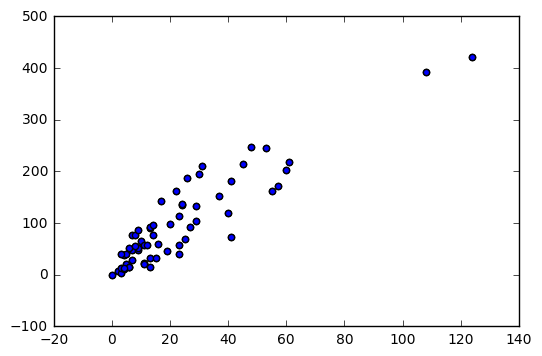

In [ ]:
## Correlation chart: Scatterplot can be used to visulize correlation between two variables

plt.scatter(data.X, data.Y)
plt.show()

## Linear regression basics

** Linear Regression is a method used to define a relationship between a dependent variable (Y) and independent variable (X). Which is simply written as : **
<img src = "y=mx+b.png" height = 200 width = "300"/>

*Where y is the dependent variable, m is the scale factor or coefficient, b being the bias coefficient and X being the independent variable.*

Following two methods will be used here to find m slope and intercept b.

### Least Squares
    The method of Least Squares minimizes the sum of the squares of the residuals between the observed targets in the dataset, and the targets predicted by the linear approximation.
    
    In this method followng formula is used to find slope m and intercept c.

<img src = "leastSquares.PNG" height = 200 width = "300"/>
    
    - x_bar is sum of x values
    - y_bar is sum of y values
    
<b> Note: For python code refer following code. </b>

### Gradient Descent
    This method can be considered universal learning method in the field of machine leanring. It is simple start at randon and gradually reduce error. Following image visulizes method of gradient descent.
    
    <img src = "linear_regression.gif" height = 400 width = "600"/>
  
    Wikipedia: https://en.wikipedia.org/wiki/Linear_regression
    
    This can be done by updating values of slope and intercept iteratively.
    
##### Details of Gradient Descent    
    
We will take m=0 and b=0 as initial values which is just horizontal line. 

Our challenge is to determine the value of optimum values of m and c, such that the line corresponding to those values is the best fitting line or gives the minimum error.

Error in current values of m and b is called loss function. It means that we need to optimize loss function to reduce error in m and b.

Our loss function will be the Root Mean Squared Error function to calculate the loss and is given by following equation.

<img src = "meansqurederror.jpeg" height = "50" />

Here yᵢ is the actual value and ȳᵢ is the predicted value. 

Lets substitute the value of ȳᵢ:

<img src = "meansqurederrorsub.jpeg" height = 100/>

Here, we have mean of squred error, hence the name Mean Squared Error. 

Now, let's understand how to optimize values of m and b.

#### Gradient descent
We will optimize m and b using Gradient descent. It is an iterative optimization algorithm to find the minimum of a function. 

Imagine a valley and a person as in following image.

<img src = "gd.jpeg" width = "500" />

A person has no sense of direction who wants to get to the bottom of the valley. He goes down the slope and takes large steps when the slope is steep and small steps when the slope is less steep. He decides his next position based on his current position and stops when he gets to the bottom of the valley which was his goal.

Let’s try applying gradient descent to m and c and approach it step by step:

1. Initially let m = 0 and c = 0. Let L be our learning rate. This controls how much the value of m changes with each step. L could be a small value like 0.0001 for good accuracy.

We will define these all as below.

m = 0

b = 0

learning_rate = 0.01

2. Calculate the partial derivative of the loss function with respect to m, and plug in the current values of x, y, m and c in it to obtain the derivative value D. As it is in following equation.

<img src = "dm.jpeg" />

This can be written in code as,

D_m = (-2/n) * sum(X * (Y - Y_pred))

3. Similarly lets find the partial derivative with respect to c, Dc :

<img src = "dc.jpeg" />

and code for dc is given below,

D_c = (-2/n) * sum(Y - Y_pred)

4. Now we update the current value of m and c using the following equation:
<img src = "mc.jpeg" />

m = m - L * D_m  # Update m

c = c - L * D_c  # Update c

5. We repeat this process until our loss function is a very small value or ideally 0 (which means 0 error or 100% accuracy). The value of m and c that we are left with now will be the optimum values.

Practically we will repeat this process for 1000 time which is defined as,

epochs = 1000 
_________________________________________________________

Now going back to our analogy, m can be considered the current position of the person. D is equivalent to the steepness of the slope and L can be the speed with which he moves. Now the new value of m that we calculate using the above equation will be his next position, and L×D will be the size of the steps he will take. When the slope is more steep (D is more) he takes longer steps and when it is less steep (D is less), he takes smaller steps. Finally he arrives at the bottom of the valley which corresponds to our loss = 0.
Now with the optimum value of m and c our model is ready to make predictions !


# Implementation of linear regression using OLS

In [ ]:
df = data
x_bar = df.X.sum()/df.X.count()
y_bar = df.Y.sum()/df.Y.count()
print(x_bar,y_bar)

n = ((df.X-x_bar) * (df.Y-y_bar)).sum()
d = ((df.X-x_bar)**2).sum()
m = n/d
b = y_bar - m* x_bar
print(m, b)

(22L, 98.18730158730159)
(3.4086241933056853, 23.197569334576514)


##### Plotting the line along data

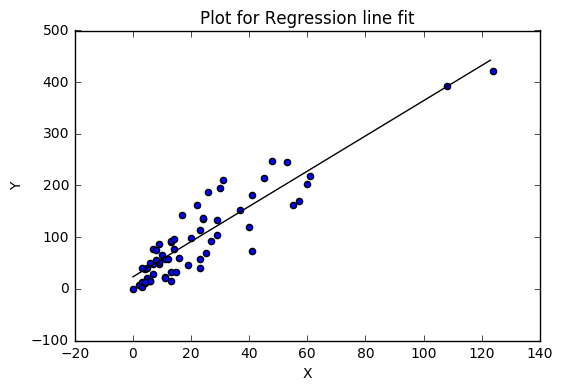

In [ ]:
predicted_df = pd.DataFrame(data = range(0,df.X.max()), columns={'X'})
predicted_df['Y'] = predicted_df.X*m + (b)

x = predicted_df['X']
y = predicted_df['Y']

plt.plot(x,y,c='black')
plt.scatter(df.X, df.Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot for Regression line fit')
#plt.legend()
plt.show()
#n = (X - x_bar)  * (Y - y_bar)

###### Q6: Quantify goodness of your model and discuss steps taken for improvement (RMSE, SSE, R2Score).

1. In sklearn mean_squared_error function can be used to find RMSE, SSE

    RMSE = square root of (mean_squared_error)
    
    SSE  = mean_squared_error * total Number of observations
    
2. In sklearn r2_score function is available to find r2_score


In [ ]:
RMSE = sqrt(mean_squared_error(df.Y, m*df.X+b))
SSE  = mean_squared_error(df.Y, m*df.X+b) * len(df.Y)
r2   = r2_score(df.Y, m*df.X+b)
print("RMSE = ", RMSE)
print("SSE = ", SSE)
print("r2score= ", r2)

('RMSE = ', 35.50024579989234)
('SSE = ', 79396.849466724758)
('r2score= ', 0.83207745729679972)


# Implementation of linear regression using Gradient Descent

In [ ]:
# Select Data

X = df.iloc[:, 0]
Y = df.iloc[:, 1]

m = 0
c = 0

L      = 0.00001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
print (m, c)

(3.8394356447863212, 0.28326102562162586)


###### Q6: Quantify goodness of your model and discuss steps taken for improvement (RMSE, SSE, R2Score).

In [ ]:
RMSE = sqrt(mean_squared_error(df.Y, m*df.X+b))
SSE  = mean_squared_error(df.Y, m*df.X+b) * len(df.Y)
r2   = r2_score(df.Y, m*df.X+b)
print("RMSE = ", RMSE)
print("SSE = ", SSE)
print("r2score= ", r2)

('RMSE = ', 38.93198889972306)
('SSE = ', 95489.084860354051)
('r2score= ', 0.79804274303261247)


# Implementation of linear regression Using sklearn API

In [ ]:
# Select Data
X = pd.DataFrame(df.X)
Y = df.Y

# Create object of algorithm
rg = linear_model.LinearRegression()
# Create model by fitting data
rg.fit(X, Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

###### Q6: Quantify goodness of your model and discuss steps taken for improvement (RMSE, SSE, R2Score).

In [ ]:
RMSE = sqrt(mean_squared_error(df.Y, m*df.X+b))
SSE  = mean_squared_error(df.Y, m*df.X+b) * len(df.Y)
r2   = r2_score(df.Y, m*df.X+b)
print("RMSE = ", RMSE)
print("SSE = ", SSE)
print("r2score= ", r2)

('RMSE = ', 38.93198889972306)
('SSE = ', 95489.084860354051)
('r2score= ', 0.79804274303261247)


### Plot data with Regression Line

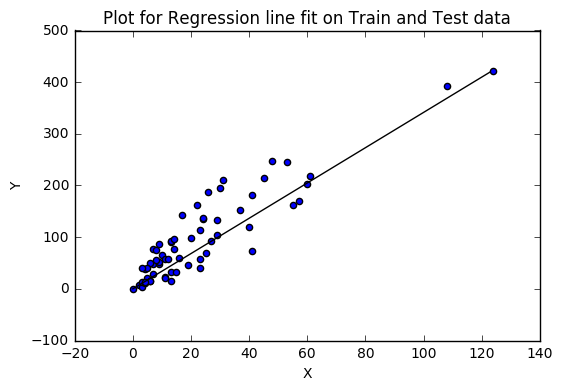

In [ ]:
x = range(0,X.max())
y = x*rg.coef_

#fig, ax = plt.subplots(figsize=(12,6))

plt.plot(x,y,c='black')
plt.scatter(df.X, df.Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot for Regression line fit on Train and Test data')
#plt.legend()
plt.show()